## 1. Course project - Introduction

**Congratulation!** You've completed all subjects of this course and can now work on the course project which consists of two parts.

* **Warm-up** - Solve a set of short tasks on synthetic data sets
* **House prices** - Predict house prices using a real data set with 2,930 observations and 82 variables

### Warm-up tasks
The goal of the warm-up is to test your global understanding of the main concepts and tools presented in this course. It consists of two short tasks that we describe in the next unit.

### House prices
This is the main part of the project. We already worked with this data set in the last units, but never built a full model with all the data cleaning, preprocessing and new predictions-making steps. Also, the goal is to build several models of varying complexity and compare the results.

## 2. Part 1 - Warm-up

The first part of the project consists of two small tasks. You can find a $.csv$ file for each one in the $warm-up.zip$ archive from the resource section. Write the solution for all the tasks in a $warm-up-solution.ipynb$ notebook that should run with the $exts-ml$ course environment.

### Task 1
The first task consists of fitting the following equation to a set of 50 x/y data points.

$y
=
a
∗
log
(
x
)
+
b$

Here is a plot of the data points with the desired model curve.

https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3782/task1-model.svg

Your curve should be optimal with respect to the residual sum of squares metric (RSS). Perform the following steps

1. Fit the curve, plot it
2. Compute the RSS and 
$R
2$
 measures
3. Discuss the results, is it a good 
$R
2$
 score?

#### Starting Task 1

1. Importing data set
2. Plotting x and y in scatter plot
3. Using log(x) instead of x in polyfit function
4. Apply coefs from polyfit function to create fit line plot
5. Calculate RSS for both polyfit and mean baseline
6. Calculate R2 and comment

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing data set
data_task1 = pd.read_csv('task-1.csv')
data_task1.shape

(50, 2)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
x = data_task1.x.values
y = data_task1.y.values

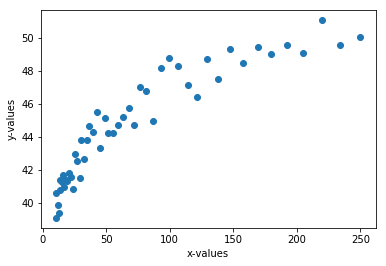

In [5]:
# Plotting x and y in scatter plot
plt.scatter(x,y)
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.show()

In [6]:
# Using log(x) instead of x in polyfit function
coefs = np.polyfit(np.log(x),y,deg=1)
a, b = coefs
print('a:',a)
print('b:',b)

a: 3.3902409977137995
b: 31.52920121929614


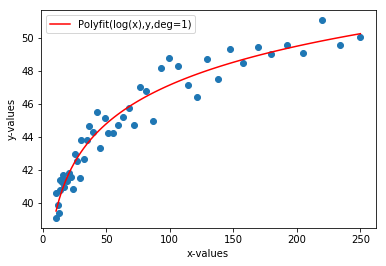

In [7]:
# Apply coefs from polyfit function to create fit line plot
x_values = np.linspace(x.min(),x.max(),num=100)
y_values = np.polyval(coefs, np.log(x_values))

plt.scatter(x,y)
plt.plot(x_values, y_values,c='red',label='Polyfit(log(x),y,deg=1)')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.legend()
plt.show()

In [8]:
# Calculate RSS for both polyfit and mean baseline
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

In [9]:
y_pred = np.polyval(coefs, np.log(x))

In [10]:
rss_poly = RSS(y, y_pred)
rss_poly

31.842651752756687

In [11]:
# compute baseline
rss_base= RSS(y, np.mean(y))
rss_base

541.1432872199999

In [12]:
# Calculate R2 and comment
R2 = 1 - (rss_poly / rss_base)
print('R2 coefficient:', R2)

R2 coefficient: 0.9411567093138288


#### Comments on R2

R2 is very **high** which means a high share of the variation can be explained by the model which is over-performing the baseline. Looking at the scatter plot it seems to make sense that the line plotted is more accurate than mean of target values

## Task 2
The second task consists of fitting a model to a set of data points that contains outliers. Here are the first five entries

https://d7whxh71cqykp.cloudfront.net/uploads/image/data/3783/task2-df.png

The goal is to try and compare different approaches to handle outliers. Use the train/test split methodology (ex. 80-20 splits) and compare the test MAE score for each one of the following approaches

1. Fit a linear regression with the outliers
2. Fit a huber regression with the outliers
3. Fit a linear regression without the outliers

The linear regression without outliers and huber regression models should both perform better than the linear regression with outliers.

### Starting Task 2

1. Import data
2. Vizualize data to identify potential outliers
3. Use z-scores to identify outliers and add outliers column to data frame (49 outliers identified)
4. Split data in train test data sets using sklearn
5. LinearRegression and HuberRegressor used with full data set (including outliers): create object, fit and predict
6. Import MAE function to compare models
7. LinearRegression without outliers. Decided to remove outliers before doing the test-train split
8. Use MAE function to compare to both models including outliers
9. Plot MAE of three models to have a vizualiation comparson

In [13]:
#Import data
data_task2 = pd.read_csv('task-2.csv')
data_task2.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


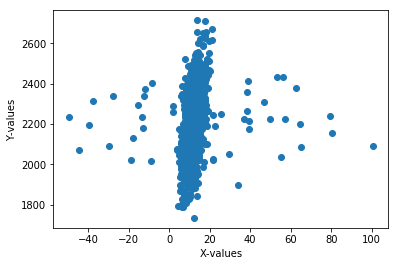

In [14]:
#Vizualize data to identify potential outliers (example below with 'X1')
plt.scatter('x1','y',data=data_task2)
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.show()

In [15]:
# Use z-scores to identify outliers and add outliers column to data frame (49 outliers identified) 
# Decision to take values that are over or below 2 (which means they are more than 2 std away from mean)
z_score_x1 = (data_task2['x1'] - data_task2['x1'].mean()) / data_task2['x1'].std()
idx_x1 = np.abs(z_score_x1) > 2

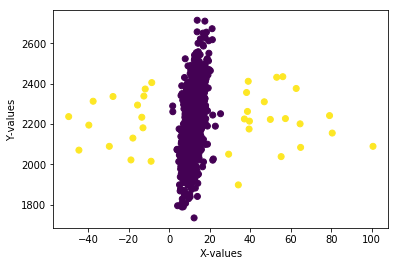

In [16]:
# Vizusalization for 'x1'
plt.scatter('x1','y',data=data_task2,c=idx_x1)
plt.xlabel('X-values')
plt.ylabel('Y-values')
plt.show()

In [17]:
z_score_x1 = (data_task2['x1'] - data_task2['x1'].mean()) / data_task2['x1'].std()
z_score_x2 = (data_task2['x2'] - data_task2['x2'].mean()) / data_task2['x2'].std()
z_score_x3 = (data_task2['x3'] - data_task2['x3'].mean()) / data_task2['x3'].std()
idx = (np.abs(z_score_x1) > 2) | (np.abs(z_score_x2) > 2) | (np.abs(z_score_x3) > 2)

In [18]:
# Adding column to dataframe
data_task2['outliers'] = idx
print(idx.sum(), 'rows are identified as outliers')

49 rows are identified as outliers


In [19]:
data_task2.head()

,x1,x2,x3,y,outliers
0,7.892,318.818,162.970,2112.420,False
1,8.830,303.180,181.399,2096.231,False
2,13.811,296.231,145.849,2067.045,False
3,12.863,325.830,167.996,2269.262,False
4,13.698,254.035,171.892,1966.604,False


In [20]:
# Split train and test groups using sklearn module
from sklearn.model_selection import train_test_split

X = data_task2.drop(['y','outliers'], axis=1).values
y = data_task2.y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [21]:
# Linear regression with outliers
from sklearn.linear_model import LinearRegression

# Create object
lr = LinearRegression()

# Fit the model
lr.fit(X_train,y_train)

# Print the coefficients
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [ 3.18946219  0.72611244 -0.29586984]
Intercept: 1982.1964160299176


In [22]:
# Huber Loss
from sklearn.linear_model import HuberRegressor

# Create object
huber = HuberRegressor(epsilon=1.35)

# Fit the model
huber.fit(X_train, y_train)

# Print the coefficients
print('Coefficients:', huber.coef_)
print('Intercept:', huber.intercept_)

Coefficients: [11.70103538  2.21157022 -0.35049233]
Intercept: 1413.3620036562397


In [23]:
# Import MAE function to compare models
from sklearn.metrics import mean_absolute_error as MAE
print('MAE LinearRegression: {:.0f}'.format(MAE(y_test,lr.predict(X_test))))
print('MAE HuberRegressor: {:.0f}'.format(MAE(y_test,huber.predict(X_test))))

MAE LinearRegression: 105
MAE HuberRegressor: 84


In [24]:
# LinearRegression without outliers. Decided to remove outliers before doing the test-train split. Is it the best way of doing it?
from sklearn.model_selection import train_test_split

X_clean = data_task2[~idx].drop(['y','outliers'], axis=1).values
y_clean = data_task2[~idx].y.values

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size = 0.2, random_state=0)

In [25]:
# Linear regression without outliers
from sklearn.linear_model import LinearRegression

# Create object
lr_clean = LinearRegression()

# Fit the model
lr_clean.fit(X_train_clean,y_train_clean)

# Print the coefficients
print('Coefficients:', lr_clean.coef_)
print('Intercept:', lr_clean.intercept_)

# MAE
print('MAE LinearRegression clean: {:.0f}'.format(MAE(y_test_clean,lr_clean.predict(X_test_clean))))

Coefficients: [28.02082578  3.71773567  2.55320976]
Intercept: 272.75877596699956
MAE LinearRegression clean: 51


In [26]:
baseline = np.mean(np.abs(y_test_clean - np.median(y_train_clean)))
#MAE(y_test_clean,np.median(y_train_clean))
# getting error using MAE function

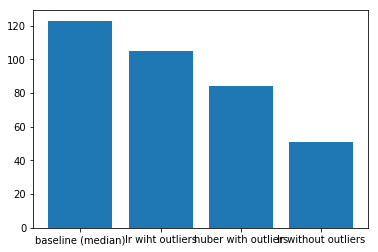

In [27]:
# Bar chart of MAE of three models to have a vizualiation comparson
plt.bar([1, 2, 3, 4], [baseline,MAE(y_test,lr.predict(X_test)),MAE(y_test,huber.predict(X_test)), MAE(y_test_clean,lr_clean.predict(X_test_clean))])
plt.xticks([1, 2, 3, 4], ['baseline (median)','lr wiht outliers', 'huber with outliers', 'lr without outliers'])
plt.show()

**We can indeed see that $HuberRegressor$ and $LinearRegression$ without outliers are both performing better than the $LinearRegression$ with outliers. The best solution which is the $LinearRegression$ without outliers is able to predict house prices with ±50 dollars of errors**